## Import libraries

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Analysis

In [3]:
sleep_data= pd.read_csv(r'C:/Users/DELL/OneDrive/Desktop/Sleep Insomnia/Sleep-Insomnia/Sleep_health_and_lifestyle_dataset.csv')
print(sleep_data.head())

   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200           None  
1         125/80          75      

In [7]:
print(sleep_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB
None


## Data exploration

In [8]:
# A look at numeric columns
print(sleep_data.describe())

        Person ID         Age  Sleep Duration  Quality of Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.673133        0.795657          1.196956   
min      1.000000   27.000000        5.800000          4.000000   
25%     94.250000   35.250000        6.400000          6.000000   
50%    187.500000   43.000000        7.200000          7.000000   
75%    280.750000   50.000000        7.800000          8.000000   
max    374.000000   59.000000        8.500000          9.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  
count               374.000000    374.000000  374.000000    374.000000  
mean                 59.171123      5.385027   70.165775   6816.844920  
std                  20.830804      1.774526    4.135676   1617.915679  
min                  30.000000      3.000000   65.000000   3000.000000  
25%                  45.000000 

In [56]:
# A look at non-numeric columns
sleep_data.describe(exclude=[np.number])

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder,Quality of Sleep(Categorical),Stress Level(Categorical)
count,374,374,374,374,374,374,374
unique,2,11,3,25,3,3,3
top,Male,Nurse,Normal,130/85,None,medium,Low
freq,189,73,216,99,219,182,141


### Splitting the blood pressure into systolic/diastolic

In [30]:
sleep_data['Systolic pressure']= sleep_data['Blood Pressure'].str.split('/').str[0].astype(int)
sleep_data['Diastolic pressure']= sleep_data['Blood Pressure'].str.split('/').str[1].astype(int)
sleep_data.head(20)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic pressure,Diastolic pressure,Quality of Sleep(Categorical)
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,126,83,Low
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80,Low
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80,Low
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,Low
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,Low
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia,140,90,Low
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia,140,90,Low
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None,120,80,Low
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None,120,80,Low
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None,120,80,Low


In [44]:
sleep_data['BMI Category']= sleep_data['BMI Category'].str.replace('Normal Weight', 'Normal')

In [25]:
# A look at the unique values at the Quality of sleep column
sleep_data['Quality of Sleep'].unique()

array([6, 4, 7, 5, 8, 9], dtype=int64)

### Collapsing data into categories

In [50]:
bin_edges=[0, 5, 7, 10]
group_labels=['Low','medium','High']
sleep_data['Quality of Sleep(Categorical)']=pd.cut(sleep_data['Quality of Sleep'], bins=bin_edges, labels=group_labels)
sleep_data[['Quality of Sleep','Quality of Sleep(Categorical)']].sample(n=20)

,Quality of Sleep,Quality of Sleep(Categorical)
54,6,medium
324,9,High
357,9,High
5,4,Low
176,8,High
103,5,Low
169,8,High
331,9,High
115,8,High
293,6,medium


In [43]:
sleep_data['Stress Level'].unique()

array([6, 8, 7, 4, 3, 5], dtype=int64)

In [47]:
ranges=[0, 4, 6, 8]
sleep_data['Stress Level(Categorical)']= pd.cut(sleep_data['Stress Level'], bins=ranges, labels=group_labels)
sleep_data[['Stress Level', 'Stress Level(Categorical)']].sample(n=10)

,Stress Level,Stress Level(Categorical)
169,5,medium
256,4,Low
203,7,High
58,8,High
158,5,medium
206,5,medium
132,5,medium
67,8,High
201,5,medium
205,5,medium


In [51]:
sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Person ID                      374 non-null    int64   
 1   Gender                         374 non-null    object  
 2   Age                            374 non-null    int64   
 3   Occupation                     374 non-null    object  
 4   Sleep Duration                 374 non-null    float64 
 5   Quality of Sleep               374 non-null    int64   
 6   Physical Activity Level        374 non-null    int64   
 7   Stress Level                   374 non-null    int64   
 8   BMI Category                   374 non-null    object  
 9   Blood Pressure                 374 non-null    object  
 10  Heart Rate                     374 non-null    int64   
 11  Daily Steps                    374 non-null    int64   
 12  Sleep Disorder                 374 n

## Checking data ranges

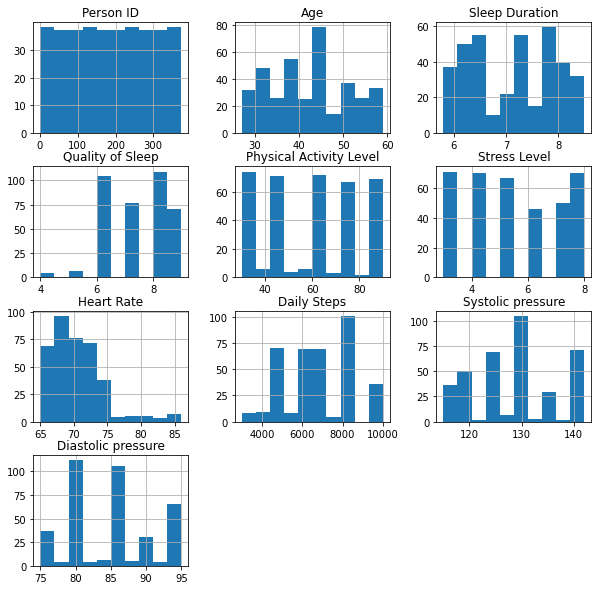

In [65]:
#Plot histograms of all the numeric columns
sleep_data.hist(figsize=(10,10), bins=10)
plt.show()

## Checking for duplicates

In [58]:
sleep_data.duplicated().sum()

0

In [61]:
subset_cols=['Person ID','Age', 'Occupation', 'Sleep Disorder', 'BMI Category']
sleep_data.duplicated(subset=subset_cols, keep=False).sum()

0